# Linear Regression
In machine learning, linear regression is a statistical procedure for calculating the value of a dependent variable from an independent variable.

### Introduction to Linear Regression in Machine Learning
Linear Regression is a supervised machine learning algorithm which uses a dependent variable to predict future outcomes based on one or more independent variables. It measures the association between two variables. Linear regression analysis is the most widely used of all machine learning algorithms.
Simply put, linear regression is a statistical test applied to a set of data to define and quantify the relationship between the variables considered. It is simple to use and is still considered among the most powerful algorithms.

The use of the linear regression algorithm is important for the following reasons:

1) Description: It helps to analyze the strength of the association between the result (dependent variable) and the predictor variables.
2) Adjustment: It adjusts the effect of covariates or confounders.
3) Predictors: It helps to estimate the important risk factors that affect the dependent variable.
4) The extent of the prediction: It helps analyze the magnitude of the change in the independent variable of a “unit” that would affect the dependent variable.
5) Prediction: It helps quantify new cases.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import datasets
from scipy import stats
%matplotlib inline

In [2]:
# Getting data from datasets
diabetes = datasets.load_diabetes()

In [3]:
# Loading into DataFrame
diabetes_data = pd.DataFrame(data = diabetes.data, columns = diabetes.feature_names)

In [4]:
diabetes_data['target'] = diabetes.target

In [5]:
# Basic EDA
diabetes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
 10  target  442 non-null    float64
dtypes: float64(11)
memory usage: 38.1 KB


In [6]:
diabetes_data.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


In [7]:
diabetes_data.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,442.000000
mean,-2.511817e-19,1.230790e-17,-2.245564e-16,-4.797570e-17,-1.381499e-17,3.918434e-17,-5.777179e-18,-9.042540e-18,9.293722e-17,1.130318e-17,152.133484
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,77.093005
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123988e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260971e-01,-1.377672e-01,25.000000
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665608e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324559e-02,-3.317903e-02,87.000000
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670422e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947171e-03,-1.077698e-03,140.500000
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564379e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243232e-02,2.791705e-02,211.500000
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320436e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335973e-01,1.356118e-01,346.000000


In [8]:
diabetes_data.isnull().sum()

age       0
sex       0
bmi       0
bp        0
s1        0
s2        0
s3        0
s4        0
s5        0
s6        0
target    0
dtype: int64

In [9]:
# Linear Regression Assumptions
# Linearity
pearson = diabetes_data.corr()

In [10]:
kendall = diabetes_data.corr(method ='kendall')

In [11]:
spearman = diabetes_data.corr(method = 'spearman')

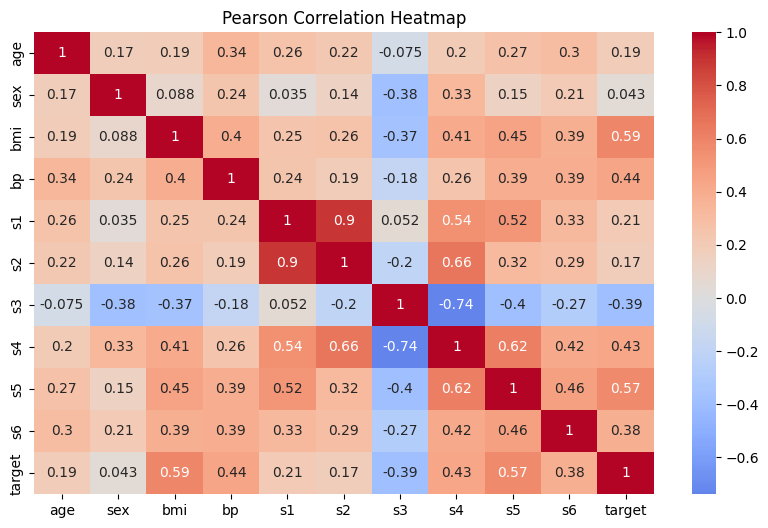

In [12]:
plt.figure(figsize=(10, 6))
sns.heatmap(pearson, annot=True, cmap='coolwarm', center=0)
plt.title("Pearson Correlation Heatmap")
plt.show()

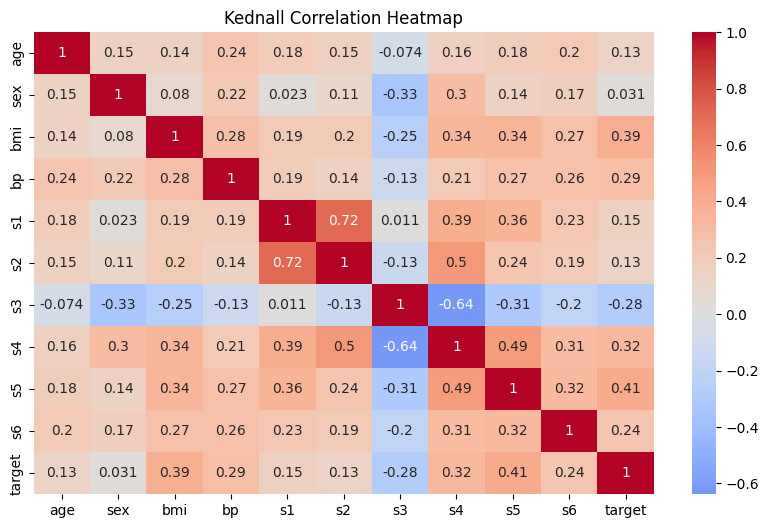

In [13]:
plt.figure(figsize=(10, 6))
sns.heatmap(kendall, annot=True, cmap='coolwarm', center=0)
plt.title("Kednall Correlation Heatmap")
plt.show()

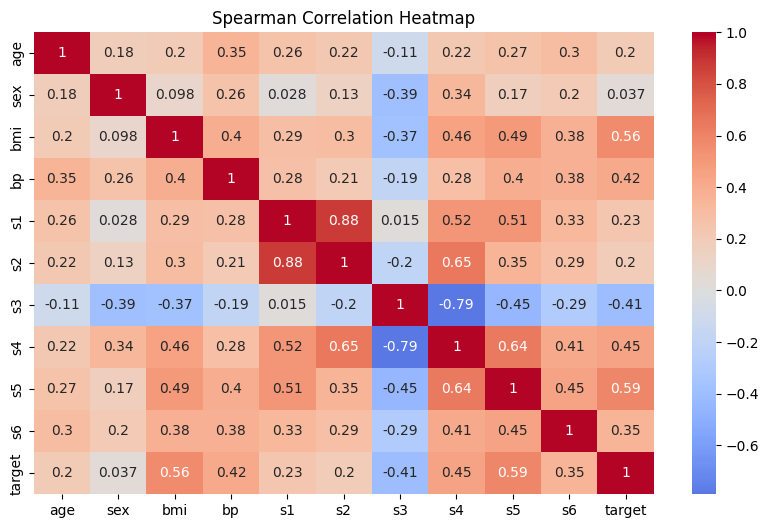

In [14]:
plt.figure(figsize=(10, 6))
sns.heatmap(spearman, annot=True, cmap='coolwarm', center=0)
plt.title("Spearman Correlation Heatmap")
plt.show()

In [15]:
# Checking No Multicolinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
VIF_df = pd.DataFrame()
VIF_df['features'] = diabetes_data.columns
VIF_df['VIF'] = [variance_inflation_factor(diabetes_data.values, i) for i in range(diabetes_data.shape[1])]

In [16]:
VIF_df

,features,VIF
0,age,1.217315
1,sex,1.283075
2,bmi,1.532949
3,bp,1.468583
4,s1,59.257108
5,s2,39.213144
6,s3,15.403044
7,s4,8.893714
8,s5,10.125073
9,s6,1.485021


<Axes: xlabel='target', ylabel='Density'>

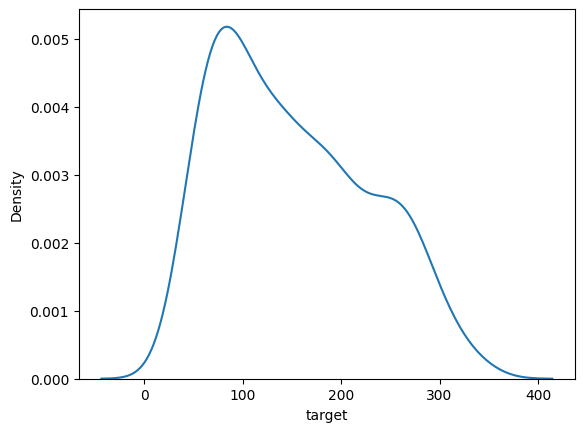

In [17]:
# Checking Normality
sns.kdeplot(diabetes_data['target'])

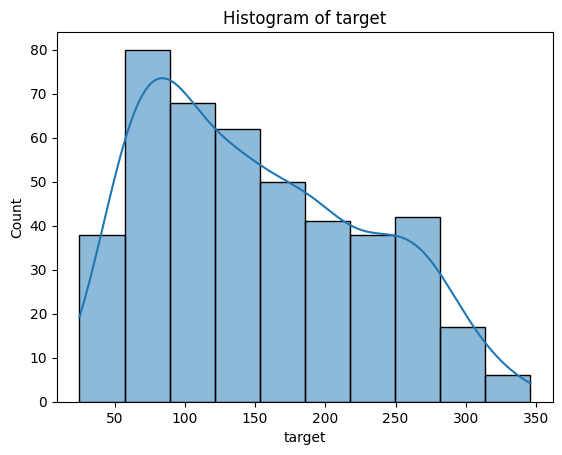

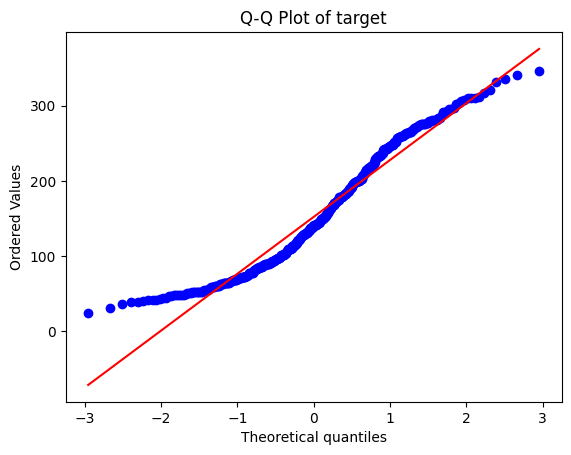

In [18]:
column_to_check = 'target'
sns.histplot(diabetes_data[column_to_check], kde=True)
plt.title(f'Histogram of {column_to_check}')
plt.show()

stats.probplot(diabetes_data[column_to_check], plot=plt)
plt.title(f'Q-Q Plot of {column_to_check}')
plt.show()

In [19]:
# Perform the Shapiro-Wilk test for normality
p_value = stats.shapiro(diabetes_data[column_to_check])[1]
significance_level = 0.05
if p_value > significance_level:
    print(f'{column_to_check} column is likely normally distributed (p-value = {p_value})')
else:
    print(f'{column_to_check} column is not normally distributed (p-value = {p_value})')

target column is not normally distributed (p-value = 3.364197462274454e-11)


Training Linear Regression with Python
To train the linear regression algorithm using the Python programming language, I will first split the dataset into 80% training and 20% test sets:

##### Now let’s train the model:

In [20]:
x = diabetes_data.drop(['target'], axis =1)
y = diabetes_data['target']

In [21]:
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=10)
# There are three steps to model something with sklearn
# 1. Set up the model
model = LinearRegression()
# 2. Use fit
model.fit(X_train, y_train)

LinearRegression()

##### Now let’s plot our trained model by using the matplotlib library in Python:

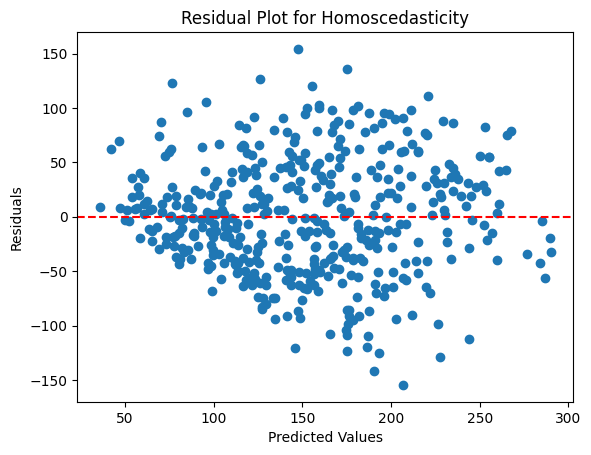

In [22]:
# Checking Homoscedasticty
prediction = model.predict(x)
Error = y - prediction
plt.scatter(prediction, Error)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot for Homoscedasticity')
plt.show()

In [23]:
import numpy as np
from statsmodels.stats.diagnostic import het_breuschpagan
import statsmodels.api as sm

# Perform the Breusch-Pagan test for homoscedasticity
error_squared = Error**2
exog_het = sm.add_constant(x)

lm_test, lm_p_value, fvalue, f_p_value = het_breuschpagan(error_squared, exog_het)
significance_level = 0.05
if lm_p_value > significance_level:
    print(f'Homoscedasticity is likely met (p-value = {lm_p_value})')
else:
    print(f'Homoscedasticity might be violated (p-value = {lm_p_value})')


Homoscedasticity is likely met (p-value = 0.05948693315839425)


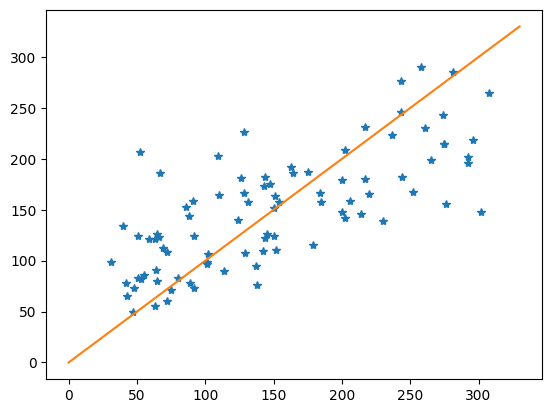

In [24]:
y_pred = model.predict(X_test) 
plt.plot(y_test, y_pred, '*')

# plot a line, a perfit predict would all fall on this line
x = np.linspace(0, 330, 100)
y = x
plt.plot(x, y)
plt.show()

In [25]:
# Evaluation of Linear Regression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
x_test_p = model.predict((X_train))
MSE = mean_squared_error(y_train, x_test_p)
RMSE = np.sqrt(MSE)
MAE = mean_absolute_error(y_train, x_test_p)
R2_score = r2_score(y_train, x_test_p)
print("*"*50)
print(f"Evaluation for Training of Linear Regression: \nMean Squared Error :{MSE}, \nRoot Mean Squared Error : {RMSE}, \nMean Absulute Error : {MAE}, \nR2 Score : {R2_score}")
print()
x_test_ = model.predict((X_test))
MSE_test = mean_squared_error(y_test, x_test_)
RMSE_test = np.sqrt(MSE_test)
MAE_test = mean_absolute_error(y_test, x_test_)
R2_score_test = r2_score(y_test, x_test_)
print("*"*50)
print(f"Evaluation for Testing of Linear Regression: \nMean Squared Error :{MSE_test}, \nRoot Mean Squared Error : {RMSE_test}, \nMean Absulute Error : {MAE_test}, \nR2 Score : {R2_score_test}")

**************************************************
Evaluation for Training of Linear Regression: 
Mean Squared Error :2851.0368936259233, 
Root Mean Squared Error : 53.39510177559289, 
Mean Absulute Error : 43.471040585254265, 
R2 Score : 0.5122948233206475

**************************************************
Evaluation for Testing of Linear Regression: 
Mean Squared Error :2911.8118861191774, 
Root Mean Squared Error : 53.961207233707974, 
Mean Absulute Error : 42.79610243417213, 
R2 Score : 0.5341988244945842


- It seems the model is not performing well with it more need work around feature engineering and dimensional reduction and few data analysis also it feel tuning will be more effective to increase the model accuracy as here we just to see the implementation and assumption of Linear Regression.

## Conclusion
The Linear Regression model is used to test the relationship between two variables in the form of an equation. You can implement this model with different datasets this is all end-to-end Linear model except Hyperparamete tuning.
Hope this was helpful happy to have comment and support.